<a href="https://colab.research.google.com/github/bwibokhaabi/african_language-Speech_Recognition/blob/data_visualization_daisy/amharic_preprocessing_daisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/train")
os.listdir()

['wav', 'wav.scp', 'utt2spk', 'spk2utt', 'trsTrain.txt', 'text']

In [ ]:
!pip install python_speech_features
#!pip install librose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=731ab577afa4599bbd821ff0fc60ed79d021a40b43efccde81dcf16cad982b5b
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

##What is is speech recognition? 
The goal of speech recognition is to learn how to take the input audio and predict the text content of the words and sentences that were uttered.
###Inputs of speech recognition system
**Audio:** The sound excerpts are digital audio files in .wav format.
**Transcription:**A text file corresponding to the given audio file

###what is audio data
Audio data is a wave like format of data, where the amplitude of audio change with respect to time. 
Sound is represented in the form of an audio signal having parameters such as 

*   frequency
*   bandwidth
*   decibel

A typical audio signal can be expressed as a function of Amplitude and Time.

###Audio data analysis
Audio data analysis is about analysing and understanding audio signals captured by digital devices, with numerous applications in the enterprise, healthcare, productivity, and smart cities. 


Sound waves are digitized by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD-quality audio meaning samples are taken 44,100 times per second).


Each sample is the amplitude of the wave at a particular time interval, where the bit depth determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values).






---
python Audio Libraries:

Python has some great libraries for audio processing like Librosa and PyAudio.There are also built-in modules for some basic audio functionalities.

We will mainly use two libraries for audio acquisition and playback:

1. Librosa

It is a Python module to analyze audio signals in general but geared more towards music. 

2. IPython.display.Audio

IPython.display.Audio lets you play audio directly in a jupyter notebook.

I have uploaded a random audio file from training data. Let us now load the file in your jupyter console.




####What is Sampling and Sampling frequency?

In signal processing, sampling is the reduction of a continuous signal into a series of discrete values. 
The sampling frequency or rate is the number of samples taken over some fixed amount of time.
A high sampling frequency results in less information loss but higher computational expense, 
Low sampling frequencies have higher information loss but are fast and cheap to compute.

In [ ]:
train_audio_path = 'wav/'
samples, sample_rate = librosa.load(train_audio_path+'tr_10_tr01010.wav')
print(samples)
print(sample_rate)

[-0.00562254 -0.00654164 -0.00564277 ... -0.00509709 -0.00456561
  0.        ]
22050


In [ ]:
audio, rate=librosa.load(train_audio_path+'tr_10_tr01010.wav', sr=44100)

In [ ]:
ipd.Audio(samples, rate=sample_rate)

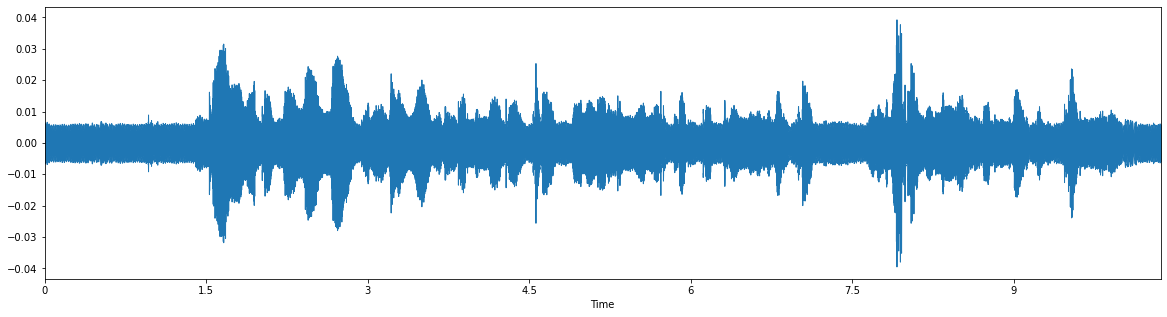

In [ ]:
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(samples, sr=sample_rate)

###Spectrogram
 
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

We can display a spectrogram using. librosa.display.specshow.

In [ ]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [ ]:
spe_samples,frequency=spectrogram(samples)

In [ ]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [ ]:
spe_samples

array([[2.89383720e-03, 2.14071519e-03, 3.17145727e-03, ...,
        2.05439133e-03, 2.95659862e-03, 2.86615153e-03],
       [1.53386470e-03, 9.37638963e-04, 1.76775941e-03, ...,
        9.18497279e-04, 1.60507209e-03, 1.44554733e-03],
       [1.10204988e-06, 4.56682306e-06, 6.10660443e-06, ...,
        3.15768078e-06, 2.12393393e-06, 6.35473688e-08],
       ...,
       [1.07841279e-16, 6.57729368e-18, 2.58833005e-18, ...,
        3.57599516e-18, 3.45021065e-19, 1.65922272e-17],
       [8.56039996e-17, 7.23422242e-19, 2.51238446e-19, ...,
        1.16501707e-18, 5.65525251e-18, 6.41642546e-18],
       [4.24548993e-17, 5.45474770e-20, 2.63398854e-18, ...,
        3.64873373e-19, 7.06840317e-18, 5.81702640e-18]])

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

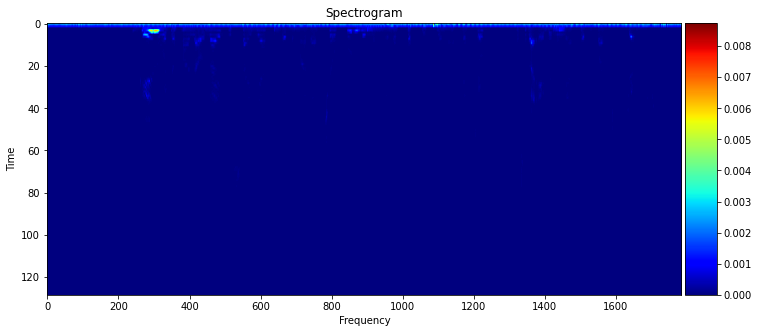

In [ ]:
plot_spectrogram_feature(spe_samples)

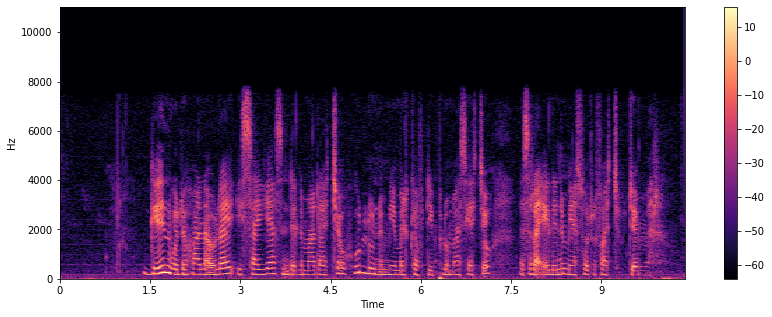

In [ ]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis shows frequencies (from 0 to 8kHz), and the horizontal axis shows the time of the clip. 

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.
.specshow is used to display a spectrogram.
The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. 


# Data Augumentation
Time Shifting
Here we shift the wave by sample_rate/10 factor. This will move the wave to the right by given factor along time axis. For achieving this I have used numpy’s roll function to generate time shifting.

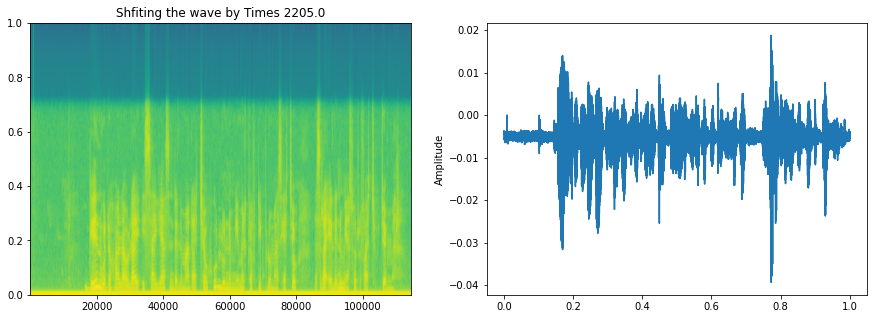

In [ ]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/10))
plot_spec(data=wav_roll,sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)

Other Data Augumentation Methods are
1. Pitch Shifting
2. Time Streching 

###Feature extraction from Audio signal
 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. 


**Mel-Frequency Cepstral Coefficients(MFCCs)**

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.



(20, 447)


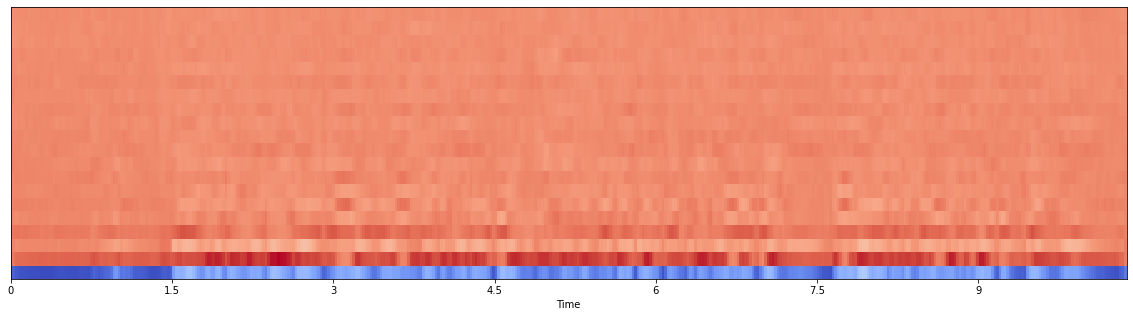

In [ ]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')